In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df_ger = df[df["Country/Region"] == "Germany"]
df_ger = df_ger.T
df_ger = df_ger.drop(["Lat","Long","Country/Region","Province/State"]).reset_index()
df_ger = df_ger.set_index( pd.to_datetime(df_ger["index"])).drop("index",axis=1)
df_ger.columns = ["Infections"]


df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
df = df[df["Country/Region"] == "Germany"]
df = df.T
df = df.drop(["Lat","Long","Country/Region","Province/State"]).reset_index()
df = df.set_index( pd.to_datetime(df["index"])).drop("index",axis=1)
df.columns = ["Deaths"]

df_ger = df_ger.join(df, how="outer")



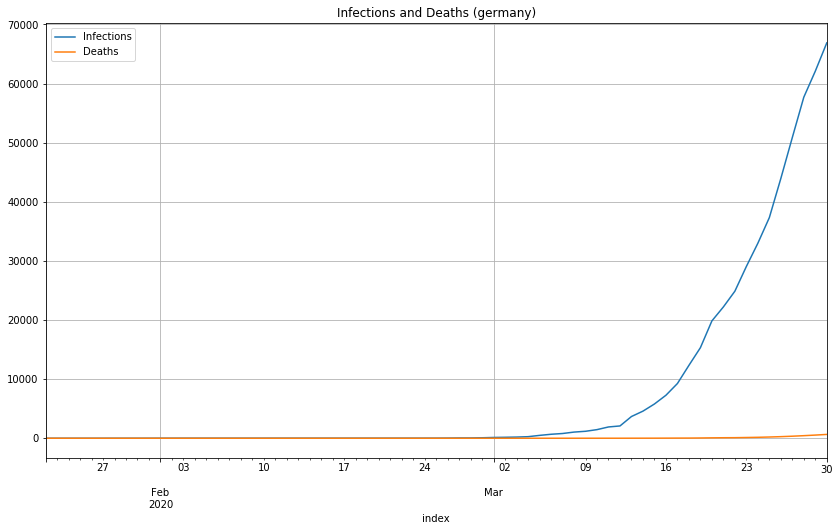

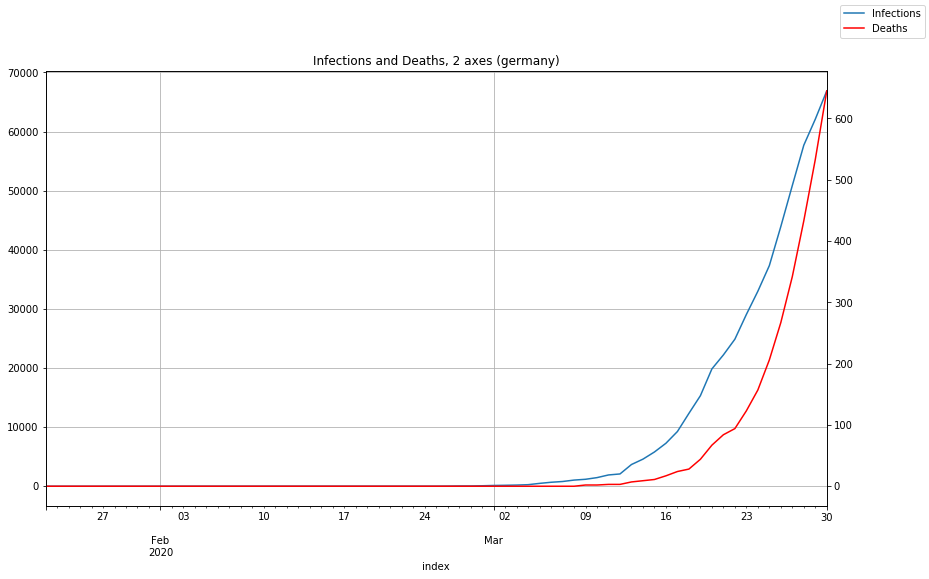

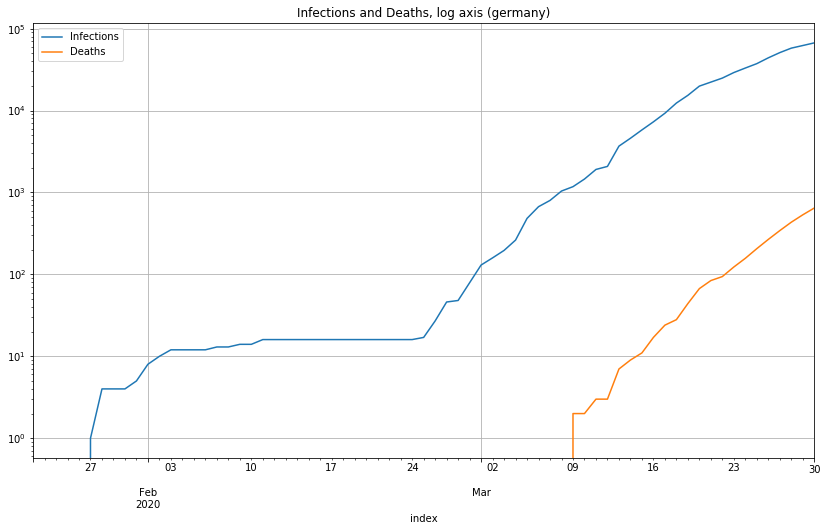

In [65]:

f,a = plt.subplots(figsize=(14,8))
df_ger.plot(figsize=(14,8), grid=True, ax=a, title="Infections and Deaths (germany)")

f,a = plt.subplots(figsize=(14,8))
df_ger["Infections"].plot(figsize=(14,8), grid=True,ax=a, title="Infections and Deaths, 2 axes (germany)")
ax1 = a.twinx()
df_ger["Deaths"].plot(ax=ax1,c="red")
f.legend()

f,a = plt.subplots(figsize=(14,8))
df_ger.plot(logy=True, figsize=(14,8), grid=True, ax=a, title="Infections and Deaths, log axis (germany)")

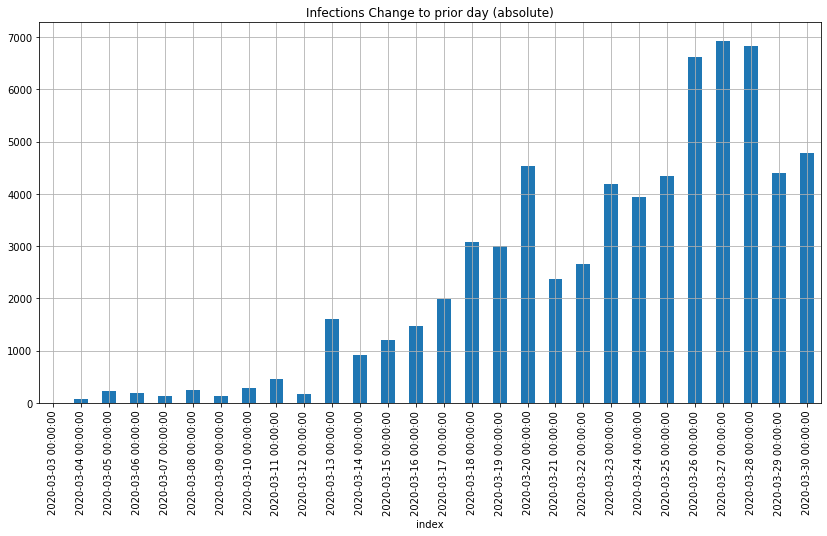

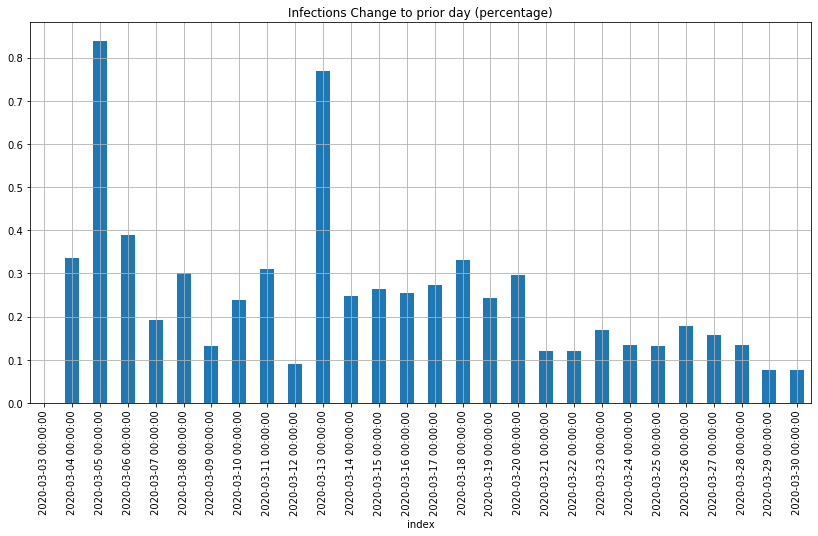

In [88]:
from datetime import datetime

todaydate = datetime.today().strftime('%Y-%m-%d')
last14days = pd.to_datetime(todaydate, format="%Y-%m-%d") - pd.DateOffset(days=14)
last28days = pd.to_datetime(todaydate, format="%Y-%m-%d") - pd.DateOffset(days=28)

f,a = plt.subplots(figsize=(14,8))
df_ger[last28days:].Infections.diff().plot(kind="bar",figsize=(14,7),grid=True, title="Infections Change to prior day (absolute)",ax=a)
f,a = plt.subplots(figsize=(14,8))
df_ger[last28days:].Infections.pct_change().plot(kind="bar",figsize=(14,7), grid=True,ax=a,title="Infections Change to prior day (percentage)")

In [87]:
#print(df_ger[last14days:].diff())
#print(df_ger[last14days:].pct_change() * 100)


table = df_ger[last14days:].diff().join(df_ger[last14days:].pct_change() * 100,rsuffix="_perc")
table.columns = ["Infections abs","Deaths abs","Infections %","Deaths %"]
table

,Infections abs,Deaths abs,Infections %,Deaths %
index,,,,
2020-03-17,NaN,NaN,NaN,NaN
2020-03-18,3070,4,33.164092,16.666667
2020-03-19,2993,16,24.280036,57.142857
2020-03-20,4528,23,29.556136,52.272727
2020-03-21,2365,17,11.915558,25.373134
2020-03-22,2660,10,11.974970,11.904762
2020-03-23,4183,29,16.817433,30.851064
2020-03-24,3930,34,13.525606,27.642276
2020-03-25,4337,49,13.148002,31.210191
